In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import BinaryEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from joblib import dump, load
from sklearn.metrics import accuracy_score, precision_score

In [93]:
thyroid_data = pd.read_csv('Thyroid_Dataset_Resampled.csv')
thyroid_data.head()

,Age,Gender,Pregnancy,Family_History_of_Thyroid,Goiter,Fatigue,Weight_Change,Hair_Loss,Heart_Rate_Changes,Sensitivity_to_Cold_or_Heat,Increased_Sweating,Muscle_Weakness,Constipation_or_More_Bowel_Movements,Depression_or_Anxiety,Difficulty_Concentrating_or_Memory_Problems,Dry_or_Itchy_Skin,Thyroid_Risk_Level
0,81,1,0,1,1,1,0,0,1,1,0,1,1,0,1,0,2
1,18,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,1
2,87,0,0,1,1,0,1,1,1,0,0,1,1,1,0,1,2
3,27,1,0,0,1,0,1,1,1,1,1,0,0,1,1,0,2
4,49,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1


In [94]:
thyroid_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10506.0,53.267847,21.785398,15.0,34.0,54.0,72.0,90.0
Gender,10506.0,0.491243,0.499947,0.0,0.0,0.0,1.0,1.0
Pregnancy,10506.0,0.240529,0.427425,0.0,0.0,0.0,0.0,1.0
Family_History_of_Thyroid,10506.0,0.480963,0.499661,0.0,0.0,0.0,1.0,1.0
Goiter,10506.0,0.307729,0.461576,0.0,0.0,0.0,1.0,1.0
Fatigue,10506.0,0.397678,0.489441,0.0,0.0,0.0,1.0,1.0
Weight_Change,10506.0,0.395393,0.488958,0.0,0.0,0.0,1.0,1.0
Hair_Loss,10506.0,0.390253,0.487830,0.0,0.0,0.0,1.0,1.0
Heart_Rate_Changes,10506.0,0.394251,0.488712,0.0,0.0,0.0,1.0,1.0
Sensitivity_to_Cold_or_Heat,10506.0,0.390253,0.487830,0.0,0.0,0.0,1.0,1.0


In [95]:
n_data = thyroid_data.dropna()

In [96]:
n_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10506.0,53.267847,21.785398,15.0,34.0,54.0,72.0,90.0
Gender,10506.0,0.491243,0.499947,0.0,0.0,0.0,1.0,1.0
Pregnancy,10506.0,0.240529,0.427425,0.0,0.0,0.0,0.0,1.0
Family_History_of_Thyroid,10506.0,0.480963,0.499661,0.0,0.0,0.0,1.0,1.0
Goiter,10506.0,0.307729,0.461576,0.0,0.0,0.0,1.0,1.0
Fatigue,10506.0,0.397678,0.489441,0.0,0.0,0.0,1.0,1.0
Weight_Change,10506.0,0.395393,0.488958,0.0,0.0,0.0,1.0,1.0
Hair_Loss,10506.0,0.390253,0.487830,0.0,0.0,0.0,1.0,1.0
Heart_Rate_Changes,10506.0,0.394251,0.488712,0.0,0.0,0.0,1.0,1.0
Sensitivity_to_Cold_or_Heat,10506.0,0.390253,0.487830,0.0,0.0,0.0,1.0,1.0


Data Visualization

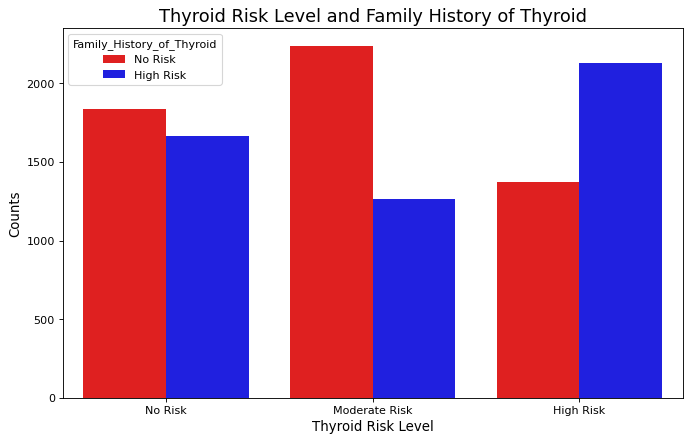

In [97]:
# Select the features for comparison
data = n_data[['Thyroid_Risk_Level', 'Family_History_of_Thyroid']]

# Group the data without filtering out "Moderate Risk"
grouped_data = data.groupby(['Thyroid_Risk_Level', 'Family_History_of_Thyroid']).size().reset_index(name='Counts')

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)

# Replace values with readable text
grouped_data['Thyroid_Risk_Level'] = grouped_data['Thyroid_Risk_Level'].replace({0: 'No Risk', 1: 'Moderate Risk', 2: 'High Risk'})
grouped_data['Family_History_of_Thyroid'] = grouped_data['Family_History_of_Thyroid'].replace({0: 'No Risk', 1: 'High Risk'})

# Create the bar plot including all risk levels
sns.barplot(x='Thyroid_Risk_Level', y='Counts', hue='Family_History_of_Thyroid', data=grouped_data, palette=['#FF0000', '#0000FF'])

# Set the title and labels
ax.set_title('Thyroid Risk Level and Family History of Thyroid', fontsize=16)
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('Thyroid Risk Level', size=12)

# Show the plot
plt.show()


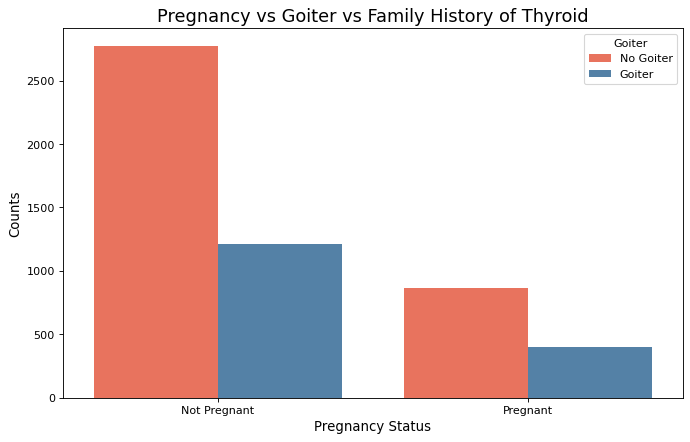

In [98]:
# Select the features for comparison
data = n_data[['Pregnancy', 'Goiter', 'Family_History_of_Thyroid']]

# Group the data by the relevant columns
grouped_data = data.groupby(['Pregnancy', 'Goiter', 'Family_History_of_Thyroid']).size().reset_index(name='Counts')

# Replace the numeric values with readable text
grouped_data['Pregnancy'] = grouped_data['Pregnancy'].replace({0: 'Not Pregnant', 1: 'Pregnant'})
grouped_data['Goiter'] = grouped_data['Goiter'].replace({0: 'No Goiter', 1: 'Goiter'})
grouped_data['Family_History_of_Thyroid'] = grouped_data['Family_History_of_Thyroid'].replace({0: 'No History', 1: 'Has History'})

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6), dpi=80)

# Create the bar plot
sns.barplot(x='Pregnancy', y='Counts', hue='Goiter', data=grouped_data, palette=['#FF6347', '#4682B4'], errorbar=None)

# Set the title and labels
ax.set_title('Pregnancy vs Goiter vs Family History of Thyroid', fontsize=16)
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('Pregnancy Status', size=12)

# Show the plot
plt.show()


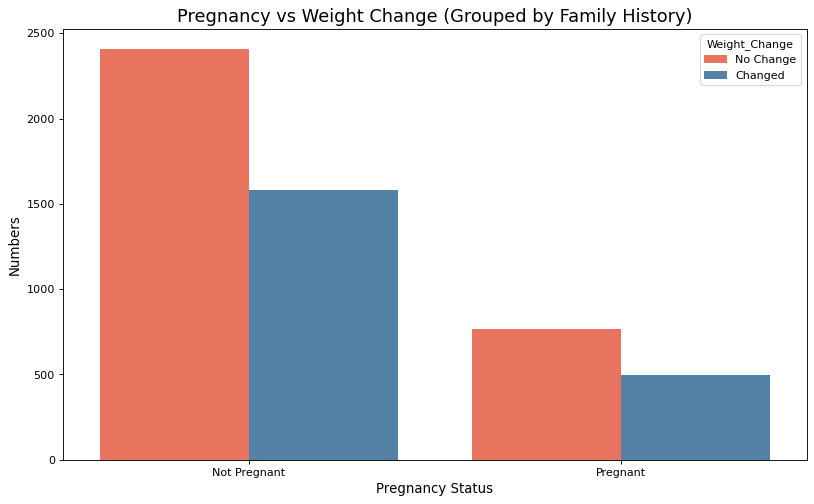

In [99]:
data = n_data[['Pregnancy', 'Weight_Change', 'Family_History_of_Thyroid']]

# Group by 3 features
grouped_data = data.groupby(['Pregnancy', 'Weight_Change', 'Family_History_of_Thyroid']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(12, 7), dpi=80)

# Correct replacements
grouped_data['Pregnancy'] = grouped_data['Pregnancy'].replace({0: 'Not Pregnant', 1: 'Pregnant'})
grouped_data['Weight_Change'] = grouped_data['Weight_Change'].replace({0: 'No Change', 1: 'Changed'})
grouped_data['Family_History_of_Thyroid'] = grouped_data['Family_History_of_Thyroid'].replace({0: 'No Family History', 1: 'Family History'})

# Use hue for Weight_Change, and split by Family History
sns.barplot(
    x='Pregnancy', 
    y='Counts', 
    hue='Weight_Change', 
    data=grouped_data, 
    palette=['#FF6347', '#4682B4'],
    errorbar=None
)

# Set titles and labels
ax.set_title('Pregnancy vs Weight Change (Grouped by Family History)', fontsize=16)
ax.set_ylabel('Numbers', size=12)
ax.set_xlabel('Pregnancy Status', size=12)

# Add facet (split by Family History)
# Here we are manually filtering and plotting per Family History if you want

plt.show()

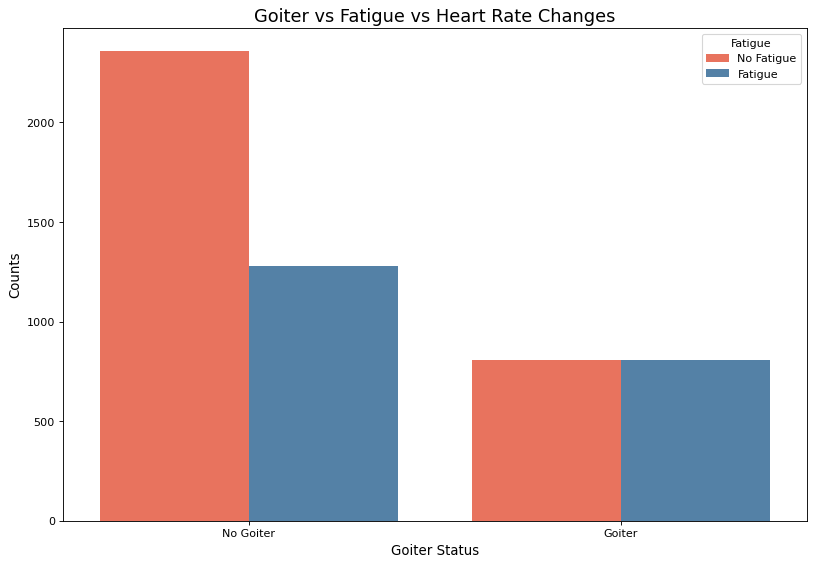

In [100]:
# Select a new set of 3 features from the dataset
data = n_data[['Goiter', 'Fatigue', 'Heart_Rate_Changes']]

# Group by the 3 new features
grouped_data = data.groupby(['Goiter', 'Fatigue', 'Heart_Rate_Changes']).size().reset_index(name='Counts')

fig, ax = plt.subplots(figsize=(12, 8), dpi=80)

# Replace values for better readability
grouped_data['Goiter'] = grouped_data['Goiter'].replace({0: 'No Goiter', 1: 'Goiter'})
grouped_data['Fatigue'] = grouped_data['Fatigue'].replace({0: 'No Fatigue', 1: 'Fatigue'})
grouped_data['Heart_Rate_Changes'] = grouped_data['Heart_Rate_Changes'].replace({0: 'No Changes', 1: 'Changes'})

# Create a barplot with the 3-way comparison
sns.barplot(
    x='Goiter',
    y='Counts',
    hue='Fatigue',
    data=grouped_data,
    palette=['#FF6347', '#4682B4'],
    errorbar=None
)

ax.set_title('Goiter vs Fatigue vs Heart Rate Changes', fontsize=16)
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('Goiter Status', size=12)

plt.show()

C:\Users\monal\AppData\Local\Temp\ipykernel_14720\3665253452.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Male', 'Female'])  # Replace '0' and '1' for Gender


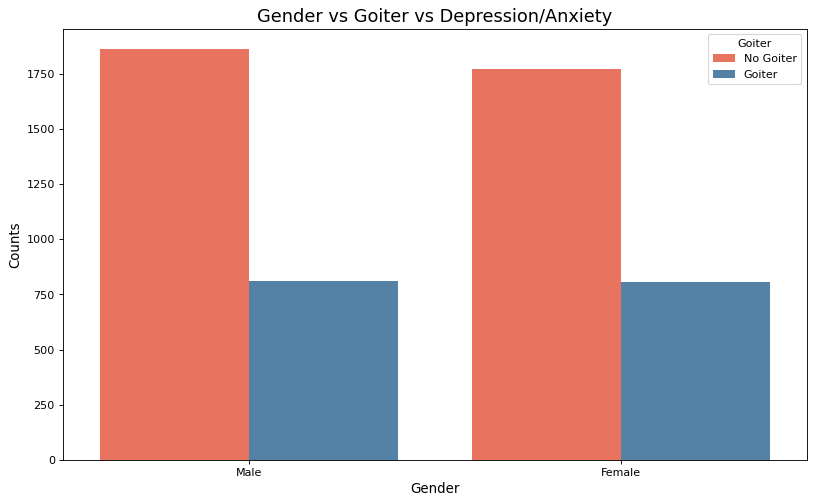

In [101]:
# Select new features for comparison (excluding Age)
data = n_data[['Gender', 'Goiter', 'Depression_or_Anxiety']]

# Group by the selected 3 features
grouped_data = data.groupby(['Gender', 'Goiter', 'Depression_or_Anxiety']).size().reset_index(name='Counts')

# Create a figure for the plot
fig, ax = plt.subplots(figsize=(12, 7), dpi=80)

# Replace values for better readability
grouped_data['Goiter'] = grouped_data['Goiter'].replace({0: 'No Goiter', 1: 'Goiter'})
grouped_data['Depression_or_Anxiety'] = grouped_data['Depression_or_Anxiety'].replace({0: 'No Depression/Anxiety', 1: 'Depression/Anxiety'})
grouped_data['Gender'] = grouped_data['Gender'].replace({0: 'Male', 1: 'Female'})  # Assuming 0 is Male, 1 is Female

# Create a barplot with the 3-way comparison (Gender as x-axis, Goiter as hue, Depression/Anxiety as part of the grouping)
sns.barplot(
    x='Gender', 
    y='Counts', 
    hue='Goiter', 
    data=grouped_data, 
    palette=['#FF6347', '#4682B4'],
    errorbar=None
)

# Set titles and labels
ax.set_title('Gender vs Goiter vs Depression/Anxiety', fontsize=16)
ax.set_ylabel('Counts', size=12)
ax.set_xlabel('Gender', size=12)

# Set custom tick labels for x-axis (for Gender, Goiter, and Depression/Anxiety)
ax.set_xticklabels(['Male', 'Female'])  # Replace '0' and '1' for Gender

# Show the plot
plt.show()



SEPARATE INPUT AND OUTPUT FEATURES

In [102]:
x = thyroid_data.drop(columns=['Thyroid_Risk_Level'])
y = thyroid_data['Thyroid_Risk_Level']

In [103]:
# Optional: reset index if needed after operations on DataFrame or Series
grouped_data = grouped_data.reset_index(drop=True)


In [104]:
imputer = SimpleImputer(strategy='mean')
x_imputed = pd.DataFrame(imputer.fit_transform(x), columns=x.columns)

# Apply SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x_imputed, y)

In [105]:
y.value_counts()

Thyroid_Risk_Level
2    3502
1    3502
0    3502
Name: count, dtype: int64

In [106]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

In [107]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from joblib import dump, load
import graphviz

dcs = DecisionTreeClassifier()
dcs.fit(x_train, y_train)
export_graphviz(dcs, out_file='tree.dot', filled=True, feature_names=x_train.columns)
with open('tree.dot') as f:
 dot_graph = f.read()
graphviz.Source(dot_graph)

#SAVE EARTH

# dump(dcs, 'decision_tree_model.joblib')

In [108]:
loaded_model = load('decision_tree_model.joblib')
loaded_prediction = loaded_model.predict(x_test)

In [109]:
from sklearn.metrics import (
    accuracy_score,
    precision_score
)

dcs_prediction = dcs.predict(x_test)

# Corrected accuracy calculation (removed 'average' parameter)
accuracy = accuracy_score(y_test, dcs_prediction)

# Precision score (you may need to specify 'average' if it's multi-class)
precision = precision_score(y_test, dcs_prediction, average='macro')

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")

Accuracy: 83.48%
Precision: 83.52%
